# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `3` | `Questions`

> "Hi Team! 👋

> Here we go again! The current script is prepared to help you to further exercise course content (But, again, do note that these are not assessment questions. They are for your exercise.)

> Some of the questions ask you to perform `reverse-engineering` 🧩. Instead of a question written in text format, you will be given the end results of some lines of code. Your task is to fill in the input cell with lines of code to create the output cell. Such a reverse-engineering exercise in computational programming will maximize your knowledge and skills in Computational Finance. 

> The questions below won’t be that difficult, as you have learned how to answer them from the lessons and the assigned readings. As you will notice from the questions, my intention is not just to give questions, but also to give additional learning pointers. I hope this helps 😊

> Enjoy!

##### First, let's do some quick exercise with stock prices data.

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import datetime

import warnings
warnings.filterwarnings("ignore")

### Let's try to import historical stock data from the web and from your machine.

#### How to import from the Web

> You need to have `pandas_datareader` and `yfinance` module.

In [2]:
import pandas_datareader.data as web
import yfinance as yf

yf.pdr_override()

> Let's start & end dates--we are interested in year 2023 until August.

In [3]:
start = datetime.datetime(2023, 1, 2)
end = datetime.datetime(2023, 8, 31)

> Then, let's use [Yahoo! Finance](https://sg.finance.yahoo.com/) for extracting historical stock data.

In [4]:
apple =\
(    web
     .get_data_yahoo("AAPL", 
                     start, 
                     end)
)

google =\
(    web
     .get_data_yahoo("GOOGL", 
                     start, 
                     end)
)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


> You may save the data to csv files.

In [5]:
apple.to_csv("apple_2023_stock.csv")
google.to_csv("google_2023_stock.csv")

> Let's read the stored files.

In [6]:
apple_2023 =\
(pd
 .read_csv("apple_2023_stock.csv",
           index_col = 0,
           parse_dates = True)
)

google_2023 =\
(pd
 .read_csv("google_2023_stock.csv", 
           index_col = 0, 
           parse_dates = True)
)

#### Have a quick look at your data.

In [7]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.538666,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.488876,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,129.069321,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.597061,70790800


In [8]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900


In [9]:
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,166.000000,166.000000,166.000000,166.000000,166.000000,1.660000e+02
mean,166.993555,168.662289,165.748073,167.331205,166.976434,6.066744e+07
std,18.429099,18.195184,18.451313,18.227959,18.348919,1.815773e+07
min,126.010002,127.769997,124.169998,125.019997,124.488876,3.145820e+07
25%,152.405006,154.277496,150.852505,152.899998,152.482891,4.849780e+07
50%,169.389999,170.400002,167.709999,169.064995,168.603798,5.586760e+07
75%,181.210003,182.905003,179.082497,180.957504,180.713474,6.777278e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.543573e+08


In [10]:
google.describe()

,Open,High,Low,Close,Adj Close,Volume
count,166.000000,166.000000,166.000000,166.000000,166.000000,1.660000e+02
mean,110.625181,112.190723,109.509759,110.915843,110.915843,3.517107e+07
std,14.212845,14.274273,14.131140,14.109641,14.109641,1.380574e+07
min,85.980003,87.570000,84.860001,86.199997,86.199997,1.446790e+07
25%,97.597502,100.032499,96.914999,98.972498,98.972498,2.670200e+07
50%,106.864998,108.084999,105.385002,107.614998,107.614998,3.156025e+07
75%,123.129999,124.792501,122.135000,123.517500,123.517500,3.751230e+07
max,134.779999,136.570007,134.070007,135.880005,135.880005,1.194550e+08


### We will `re-organize` and `re-shape` stock data

> Let's concatenate data in multiple DataFrame objects

> Let's obtain Apple adjusted close data for July and August 2022

,Adj Close
Date,
2023-07-03,192.200470
2023-07-05,191.071976
2023-07-06,191.551331
2023-07-07,190.422852
2023-07-10,188.355652


,Adj Close
Date,
2023-08-01,195.346207
2023-08-02,192.320297
2023-08-03,190.912201
2023-08-04,181.744583
2023-08-07,178.608810


### Question 1-1. Please combine the first three rows of each of `apple_07` and `apple_08`

,Adj Close
Date,
2023-07-03,192.200470
2023-07-05,191.071976
2023-07-06,191.551331
2023-08-01,195.346207
2023-08-02,192.320297
2023-08-03,190.912201


#### Question 1-2. How would you extract only the 2023 August GOOGL values?

#### Question 1-3. Please concatenate the AAPL and GOOGL 2023 August stock data--there will be duplicate index labels

,Adj Close
Date,
2023-08-01,195.346207
2023-08-02,192.320297
2023-08-03,190.912201
2023-08-01,131.550003
2023-08-02,128.380005
2023-08-03,128.449997


> Let's see the `two records for data of 2023-08-03`

,Adj Close
Date,
2023-08-03,190.912201
2023-08-03,128.449997


#### Question 1-4. Please concatenate to show a specification of the stock tickets being part of the index. This will help disambiguate the duplicate dates using a hierarchal index.

Adj Close
      Date                  
AAPL  2023-08-01  195.346207
      2023-08-02  192.320297
      2023-08-03  190.912201
GOOGL 2023-08-01  131.550003
      2023-08-02  128.380005
      2023-08-03  128.449997

> Let's extract just GOOGL values using `.loc`

,Adj Close
Date,
2023-08-01,131.550003
2023-08-02,128.380005
2023-08-03,128.449997


#### Question 1-5. Let's show concatenation using two DataFrame's that each have two columns.  `pandas` will align the data in columns by the column names (labels)

,Adj Close,Volume
Date,,
2023-01-03,124.538666,112117500
2023-01-04,125.823189,89113600
2023-01-05,124.488876,80962700
2023-01-06,129.069321,87754700
2023-01-09,129.597061,70790800
...,...,...
2023-08-24,129.779999,28500700
2023-08-25,129.880005,26762900
2023-08-28,131.009995,20543300


> Let's see concatenation with DataFrame objects that do not have the same set of columns.

> This will show pandas filling in NaN values.

,Adj Close,Volume
Date,,
2023-01-03,124.538666,112117500.0
2023-01-04,125.823189,89113600.0
2023-01-05,124.488876,80962700.0
2023-01-06,129.069321,87754700.0
2023-01-09,129.597061,70790800.0
...,...,...
2023-08-24,129.779999,NaN
2023-08-25,129.880005,NaN
2023-08-28,131.009995,NaN


### Question 2-1. Please perform an inner join on the DataFrame's since `google_a` does not have a Volume column, pandas will not include that column in the result.

,Adj Close
Date,
2023-01-03,124.538666
2023-01-04,125.823189
2023-01-05,124.488876
2023-01-06,129.069321
2023-01-09,129.597061
...,...
2023-08-24,129.779999
2023-08-25,129.880005
2023-08-28,131.009995


#### Question 2-2. Then, please concatenate along the rows, causing duplicate columns to be created in the result.

,Adj Close,Adj Close
Date,,
2023-01-03,124.538666,89.120003
2023-01-04,125.823189,88.080002
2023-01-05,124.488876,86.199997
2023-01-06,129.069321,87.339996
2023-01-09,129.597061,88.019997
...,...,...
2023-08-24,176.380005,129.779999
2023-08-25,178.610001,129.880005
2023-08-28,180.190002,131.009995


#### Question 2-3. Let's concat along rows using two DataFrame objects with different number of rows. 

#### This demonstrates how NaN values will be filled in those rows for `apple` which only has three rows as compared to 5 for `google`

AAPL                 GOOGL            
             Adj Close     Volume  Adj Close      Volume
Date                                                    
2023-01-03  124.538666  112117500  89.120003  28131200.0
2023-01-04  125.823189   89113600  88.080002  34854800.0
2023-01-05  124.488876   80962700  86.199997  27194400.0
2023-01-06  129.069321   87754700        NaN         NaN
2023-01-09  129.597061   70790800        NaN         NaN

#### Question 2-4. You know that `inner join` can also be used `along this axis`. 

#### Please include rows with index labels that do not exist in both DataFrame objects

AAPL                 GOOGL          
             Adj Close     Volume  Adj Close    Volume
Date                                                  
2023-01-03  124.538666  112117500  89.120003  28131200
2023-01-04  125.823189   89113600  88.080002  34854800
2023-01-05  124.488876   80962700  86.199997  27194400

#### Question 2-5. Please ignore indexes and just concatenate the data and have the result have a default integer index

,Adj Close
0,124.538666
1,125.823189
2,124.488876
3,89.120003
4,88.080002
5,86.199997


### `Now let's merging DataFrame objects`

,Date,Adj Close
0,2023-01-03,124.538666
1,2023-01-04,125.823189
2,2023-01-05,124.488876
3,2023-01-06,129.069321
4,2023-01-09,129.597061
...,...,...
161,2023-08-24,176.380005
162,2023-08-25,178.610001
163,2023-08-28,180.190002
164,2023-08-29,184.119995


### Question 3-1. Please merge the two DataFrame objects, so lets peek at the data to remind ourselves of what they contain.

###  `pandas` finds the columns in common, in this case Date, and merges on that column and adds a column for all the other columns in both DataFrames.

,Date,Adj Close,Volume
0,2023-01-03,124.538666,112117500
1,2023-01-04,125.823189,89113600
2,2023-01-05,124.488876,80962700
3,2023-01-06,129.069321,87754700
4,2023-01-09,129.597061,70790800


#### Question 3-2. Please use the merge function to create the below.

,Date,Adj Close,Volume
0,2023-01-05,124.488876,80962700
1,2023-01-06,129.069321,87754700


#### Question 3-3. How would you create the below then?

,Date,Adj Close,Volume
0,2023-01-03,124.538666,NaN
1,2023-01-04,125.823189,NaN
2,2023-01-05,124.488876,80962700.0
3,2023-01-06,129.069321,87754700.0
4,2023-01-09,129.597061,NaN


### Let's do some `pivoting`

### Question 4-1. Please insert `Symbol` column before combining

#### Question 4-2. Please concatenate the `Apple` and `Google` data index will consist of the Date column, which we will sort.

,Symbol,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-01-03,AAPL,130.279999,130.899994,124.169998,125.070000,124.538666,112117500
2023-01-03,GOOGL,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
2023-01-04,GOOGL,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2023-01-04,AAPL,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2023-01-05,AAPL,127.129997,127.769997,124.760002,125.019997,124.488876,80962700
...,...,...,...,...,...,...,...
2023-08-28,AAPL,180.089996,180.589996,178.550003,180.190002,180.190002,43820700
2023-08-29,GOOGL,132.240005,136.570007,132.240005,134.570007,134.570007,43075600
2023-08-29,AAPL,179.699997,184.899994,179.500000,184.119995,184.119995,53003900


#### Question 4-3. Please pushes the index into a column and resets to a default integer index.

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,AAPL,130.279999,130.899994,124.169998,125.070000,124.538666,112117500
1,2023-01-03,GOOGL,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
2,2023-01-04,GOOGL,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
3,2023-01-04,AAPL,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
4,2023-01-05,AAPL,127.129997,127.769997,124.760002,125.019997,124.488876,80962700


#### Question 4-4. Please pivot Date into the Index, make the columns match the unique values in the Symbol column, and the values will be the AdjClose values

Symbol,AAPL,GOOGL
Date,,
2023-01-03,124.538666,89.120003
2023-01-04,125.823189,88.080002
2023-01-05,124.488876,86.199997
2023-01-06,129.069321,87.339996
2023-01-09,129.597061,88.019997
...,...,...
2023-08-24,176.380005,129.779999
2023-08-25,178.610001,129.880005
2023-08-28,180.190002,131.009995


### Let's execute `stacking` and `unstacking`

### Question 5-1. Please stack the first level of columns into the index.

### Let's move AAPL and GOOGL into the index leaving a single colum which is the AdjClose values

Date        Symbol
2023-01-03  AAPL      124.538666
            GOOGL      89.120003
2023-01-04  AAPL      125.823189
            GOOGL      88.080002
2023-01-05  AAPL      124.488876
                         ...    
2023-08-28  GOOGL     131.009995
2023-08-29  AAPL      184.119995
            GOOGL     134.570007
2023-08-30  AAPL      187.649994
            GOOGL     135.880005
Length: 332, dtype: float64

> Using `.loc` we can retrieve close values by specifying both the date and ticker

125.82318878173828

#### Question 5-2. Please lookup on just the date, which will give us two values one each for AAPL and GOOGL.  

Symbol
AAPL     125.823189
GOOGL     88.080002
dtype: float64

> Let's have a look at all values for the GOOGL symbol

Date
2023-01-03     89.120003
2023-01-04     88.080002
2023-01-05     86.199997
2023-01-06     87.339996
2023-01-09     88.019997
                 ...    
2023-08-24    129.779999
2023-08-25    129.880005
2023-08-28    131.009995
2023-08-29    134.570007
2023-08-30    135.880005
Length: 166, dtype: float64

#### Question 5-3. Please pivot the last level of the index back into a column

Symbol,AAPL,GOOGL
Date,,
2023-01-03,124.538666,89.120003
2023-01-04,125.823189,88.080002
2023-01-05,124.488876,86.199997


### Now, let's do some `melting`

### Question 6-1. Please use `melt` to make id_vars of Date and Symbol, making the column names the variable and the for each the value

,Date,Symbol,variable,value
0,2023-01-03,AAPL,Open,130.279999
1,2023-01-03,GOOGL,Open,89.589996
2,2023-01-04,GOOGL,Open,90.349998
3,2023-01-04,AAPL,Open,126.889999
4,2023-01-05,AAPL,Open,127.129997


#### Question 6-2. Please extract the values for the data for Google on 2023-08-24

,Date,Symbol,variable,value
322,2023-08-24,GOOGL,Open,1.339500e+02
654,2023-08-24,GOOGL,High,1.342500e+02
986,2023-08-24,GOOGL,Low,1.295700e+02
1318,2023-08-24,GOOGL,Close,1.297800e+02
1650,2023-08-24,GOOGL,Adj Close,1.297800e+02
1982,2023-08-24,GOOGL,Volume,2.850070e+07


### Let's do some grouping and aggregation

##### To do so, we will do some splitting first.

> Let's construct a DataFrame to demonstrate splitting

### Question 7-1. Please extract from combined the Symbol and AdjClose, and reset the index

,Date,Symbol,Adj Close
0,2023-01-03,AAPL,124.538666
1,2023-01-03,GOOGL,89.120003
2,2023-01-04,GOOGL,88.080002
3,2023-01-04,AAPL,125.823189
4,2023-01-05,AAPL,124.488876
...,...,...,...
327,2023-08-28,AAPL,180.190002
328,2023-08-29,GOOGL,134.570007
329,2023-08-29,AAPL,184.119995
330,2023-08-30,AAPL,187.649994


#### Question 7-2. Please add two columns, year and month, using the year and month portions of the data as integers

,Date,Year,Symbol,Adj Close
0,2023-01-03,2023,AAPL,124.538666
1,2023-01-03,2023,GOOGL,89.120003
2,2023-01-04,2023,GOOGL,88.080002
3,2023-01-04,2023,AAPL,125.823189
4,2023-01-05,2023,AAPL,124.488876
...,...,...,...,...
327,2023-08-28,2023,AAPL,180.190002
328,2023-08-29,2023,GOOGL,134.570007
329,2023-08-29,2023,AAPL,184.119995
330,2023-08-30,2023,AAPL,187.649994


,Date,Year,Month,Symbol,Adj Close
0,2023-01-03,2023,1,AAPL,124.538666
1,2023-01-03,2023,1,GOOGL,89.120003
2,2023-01-04,2023,1,GOOGL,88.080002
3,2023-01-04,2023,1,AAPL,125.823189
4,2023-01-05,2023,1,AAPL,124.488876
...,...,...,...,...,...
327,2023-08-28,2023,8,AAPL,180.190002
328,2023-08-29,2023,8,GOOGL,134.570007
329,2023-08-29,2023,8,AAPL,184.119995
330,2023-08-30,2023,8,AAPL,187.649994


> Let's group by the Symbol column

> Here, please save the result!

> The groupby object has a property groups, which shows how all rows will in mapped into the groups.

> The type of this object is a python dict

pandas.io.formats.printing.PrettyDict

> Let's show the mappings of rows to groups

{'AAPL': [0, 3, 4, 6, 8, 11, 13, 15, 17, 19, 21, 23, 24, 26, 28, 31, 32, 35, 37, 39, 40, 42, 45, 46, 48, 50, 52, 54, 56, 59, 61, 62, 65, 66, 69, 71, 72, 75, 76, 79, 80, 82, 84, 86, 88, 91, 93, 95, 97, 98, 101, 102, 104, 107, 108, 111, 112, 114, 116, 119, 121, 123, 125, 127, 129, 130, 132, 135, 137, 139, 141, 143, 145, 147, 148, 151, 153, 154, 157, 158, 161, 163, 164, 167, 169, 171, 172, 174, 176, 178, 180, 183, 185, 186, 188, 190, 193, 195, 197, 199, ...], 'GOOGL': [1, 2, 5, 7, 9, 10, 12, 14, 16, 18, 20, 22, 25, 27, 29, 30, 33, 34, 36, 38, 41, 43, 44, 47, 49, 51, 53, 55, 57, 58, 60, 63, 64, 67, 68, 70, 73, 74, 77, 78, 81, 83, 85, 87, 89, 90, 92, 94, 96, 99, 100, 103, 105, 106, 109, 110, 113, 115, 117, 118, 120, 122, 124, 126, 128, 131, 133, 134, 136, 138, 140, 142, 144, 146, 149, 150, 152, 155, 156, 159, 160, 162, 165, 166, 168, 170, 173, 175, 177, 179, 181, 182, 184, 187, 189, 191, 192, 194, 196, 198, ...]}

> Yes, this reports the number of groups that resulted from the grouping

(2, 2)

### Question 8-1. Please create a function that prints the contents of a group.

###  When you execute your function you should see the following results.

AAPL
        Date  Year Month Symbol   Adj Close
0 2023-01-03  2023     1   AAPL  124.538666
3 2023-01-04  2023     1   AAPL  125.823189
4 2023-01-05  2023     1   AAPL  124.488876
6 2023-01-06  2023     1   AAPL  129.069321
8 2023-01-09  2023     1   AAPL  129.597061
GOOGL
        Date  Year Month Symbol  Adj Close
1 2023-01-03  2023     1  GOOGL  89.120003
2 2023-01-04  2023     1  GOOGL  88.080002
5 2023-01-05  2023     1  GOOGL  86.199997
7 2023-01-06  2023     1  GOOGL  87.339996
9 2023-01-09  2023     1  GOOGL  88.019997


> .size will tell us the count of items in each group

Symbol
AAPL     166
GOOGL    166
dtype: int64

#### Question 8-2. As you know, a specific group can be retrieved using .get_group() which returns a DataFrame representing the specified group. Please execute so that you can have the output below.

,Date,Year,Month,Symbol,Adj Close
0,2023-01-03,2023,1,AAPL,124.538666
3,2023-01-04,2023,1,AAPL,125.823189
4,2023-01-05,2023,1,AAPL,124.488876
6,2023-01-06,2023,1,AAPL,129.069321
8,2023-01-09,2023,1,AAPL,129.597061
...,...,...,...,...,...
323,2023-08-24,2023,8,AAPL,176.380005
325,2023-08-25,2023,8,AAPL,178.610001
327,2023-08-28,2023,8,AAPL,180.190002
329,2023-08-29,2023,8,AAPL,184.119995


#### Question 8-3. Please group by three different fields (`Symbol`, `Year`, `Month`) and print the result

('AAPL', 2023, 1)
        Date  Year  Month Symbol   Adj Close
0 2023-01-03  2023      1   AAPL  124.538666
3 2023-01-04  2023      1   AAPL  125.823189
4 2023-01-05  2023      1   AAPL  124.488876
6 2023-01-06  2023      1   AAPL  129.069321
8 2023-01-09  2023      1   AAPL  129.597061
('AAPL', 2023, 2)
         Date  Year  Month Symbol   Adj Close
40 2023-02-01  2023      2   AAPL  144.812164
42 2023-02-02  2023      2   AAPL  150.179291
45 2023-02-03  2023      2   AAPL  153.843628
46 2023-02-06  2023      2   AAPL  151.085388
48 2023-02-07  2023      2   AAPL  153.992981
('AAPL', 2023, 3)
         Date  Year  Month Symbol   Adj Close
79 2023-03-01  2023      3   AAPL  144.913605
80 2023-03-02  2023      3   AAPL  145.511978
82 2023-03-03  2023      3   AAPL  150.617996
84 2023-03-06  2023      3   AAPL  153.410370
86 2023-03-07  2023      3   AAPL  151.186447
('AAPL', 2023, 4)
          Date  Year  Month Symbol   Adj Close
125 2023-04-03  2023      4   AAPL  165.716690
127 2023-04-

### Question 9-1. Let's set the index of the data to be the following three fields we are creating a multiindex

Date   Adj Close
Symbol Year Month                       
AAPL   2023 1     2023-01-03  124.538666
GOOGL  2023 1     2023-01-03   89.120003
            1     2023-01-04   88.080002
AAPL   2023 1     2023-01-04  125.823189
            1     2023-01-05  124.488876
...                      ...         ...
            8     2023-08-28  180.190002
GOOGL  2023 8     2023-08-29  134.570007
AAPL   2023 8     2023-08-29  184.119995
            8     2023-08-30  187.649994
GOOGL  2023 8     2023-08-30  135.880005

[332 rows x 2 columns]

#### Question 9-2. Then, please group based upon values in the actual index the following groups by level 0 of the index (Month)

AAPL
                        Date   Adj Close
Symbol Year Month                       
AAPL   2023 1     2023-01-03  124.538666
            1     2023-01-04  125.823189
            1     2023-01-05  124.488876
            1     2023-01-06  129.069321
            1     2023-01-09  129.597061
GOOGL
                        Date  Adj Close
Symbol Year Month                      
GOOGL  2023 1     2023-01-03  89.120003
            1     2023-01-04  88.080002
            1     2023-01-05  86.199997
            1     2023-01-06  87.339996
            1     2023-01-09  88.019997


#### Question 9-3. Please group by three levels in the index using their names

('AAPL', 2023, 1)
                        Date   Adj Close
Symbol Year Month                       
AAPL   2023 1     2023-01-03  124.538666
            1     2023-01-04  125.823189
            1     2023-01-05  124.488876
            1     2023-01-06  129.069321
            1     2023-01-09  129.597061
('AAPL', 2023, 2)
                        Date   Adj Close
Symbol Year Month                       
AAPL   2023 2     2023-02-01  144.812164
            2     2023-02-02  150.179291
            2     2023-02-03  153.843628
            2     2023-02-06  151.085388
            2     2023-02-07  153.992981
('AAPL', 2023, 3)
                        Date   Adj Close
Symbol Year Month                       
AAPL   2023 3     2023-03-01  144.913605
            3     2023-03-02  145.511978
            3     2023-03-03  150.617996
            3     2023-03-06  153.410370
            3     2023-03-07  151.186447
('AAPL', 2023, 4)
                        Date   Adj Close
Symbol Year Month         

### Remember `agg`?

### Question 10-1. Use `numpy` apply the mean function to each group.

Date   Adj Close
Symbol Year Month                                          
AAPL   2023 1     2023-01-16 15:36:00.000000000  135.202166
            2     2023-02-14 00:00:00.000000000  150.471768
            3     2023-03-16 08:20:52.173913088  154.542043
            4     2023-04-15 22:44:12.631578880  164.595553
            5     2023-05-15 01:05:27.272727296  172.293533
            6     2023-06-15 21:42:51.428571392  184.034816
            7     2023-07-16 20:24:00.000000000  192.152022
            8     2023-08-15 07:38:10.909090816  180.684969
GOOGL  2023 1     2023-01-16 15:36:00.000000000   93.040499
            2     2023-02-14 00:00:00.000000000   96.416842
            3     2023-03-16 08:20:52.173913088   98.060000
            4     2023-04-15 22:44:12.631578880  105.711053
            5     2023-05-15 01:05:27.272727296  116.124091
            6     2023-06-15 21:42:51.428571392  122.530000
            7     2023-07-16 20:24:00.000000000  123.054500
            8     2023-08-15 07:38:10.909090816  130.293636

#### Question 10-2. How would you obtain the below then?

,Date,Year,Month,Symbol,Adj Close
0,2023-01-03,2023,1,AAPL,124.538666
1,2023-01-03,2023,1,GOOGL,89.120003
2,2023-01-04,2023,1,GOOGL,88.080002
3,2023-01-04,2023,1,AAPL,125.823189
4,2023-01-05,2023,1,AAPL,124.488876
...,...,...,...,...,...
327,2023-08-28,2023,8,AAPL,180.190002
328,2023-08-29,2023,8,GOOGL,134.570007
329,2023-08-29,2023,8,AAPL,184.119995
330,2023-08-30,2023,8,AAPL,187.649994


,Symbol,Year,Month,Date,Adj Close
0,AAPL,2023,1,2023-01-16 15:36:00.000000000,135.202166
1,AAPL,2023,2,2023-02-14 00:00:00.000000000,150.471768
2,AAPL,2023,3,2023-03-16 08:20:52.173913088,154.542043
3,AAPL,2023,4,2023-04-15 22:44:12.631578880,164.595553
4,AAPL,2023,5,2023-05-15 01:05:27.272727296,172.293533


#### Question 10-3. Please apply multiple functions to each group in one call so that you can obtain the below.

Date                            \
                                           mean                       std   
Symbol Year Month                                                           
AAPL   2023 1     2023-01-16 15:36:00.000000000 8 days 23:07:28.349947786   
            2     2023-02-14 00:00:00.000000000 8 days 11:48:13.778084579   
            3     2023-03-16 08:20:52.173913088 9 days 11:31:26.207511746   
            4     2023-04-15 22:44:12.631578880 8 days 03:03:16.733566575   
            5     2023-05-15 01:05:27.272727296 9 days 05:38:16.163540207   
            6     2023-06-15 21:42:51.428571392 9 days 06:41:01.999313202   
            7     2023-07-16 20:24:00.000000000 8 days 09:17:32.086684966   
            8     2023-08-15 07:38:10.909090816 9 days 03:15:45.066017849   
GOOGL  2023 1     2023-01-16 15:36:00.000000000 8 days 23:07:28.349947786   
            2     2023-02-14 00:00:00.000000000 8 days 11:48:13.778084579   
            3     2023-03-16 08:20:52.173913088 9 days 11:31:26.207511746   
            4     2023-04-15 22:44:12.631578880 8 days 03:03:16.733566575   
            5     2023-05-15 01:05:27.272727296 9 days 05:38:16.163540207   
            6     2023-06-15 21:42:51.428571392 9 days 06:41:01.999313202   
            7     2023-07-16 20:24:00.000000000 8 days 09:17:32.086684966   
            8     2023-08-15 07:38:10.909090816 9 days 03:15:45.066017849   

                    Adj Close            
                         mean       std  
Symbol Year Month                        
AAPL   2023 1      135.202166  6.607695  
            2      150.471768  2.899287  
            3      154.542043  5.124338  
            4      164.595553  2.382709  
            5      172.293533  2.923868  
            6      184.034816  4.016423  
            7      192.152022  2.267709  
            8      180.684969  5.843950  
GOOGL  2023 1       93.040499  4.502412  
            2       96.416842  5.864478  
            3       98.060000  5.252508  
            4      105.711053  1.568672  
            5      116.124091  7.611528  
            6      122.530000  2.430339  
            7      123.054500  4.761495  
            8      130.293636  2.063730

### Now let's do something with a 2-D array of Dow Jones Industrial Average in 2008

The array `data_problem_sets_3.csv` is a 2-D array with each row holding the
daily performance of the Dow Jones Industrial Average from the
beginning of 2008 (dates have been removed for exercise simplicity).
The array has the following structure::

       OPEN      HIGH      LOW       CLOSE     VOLUME      ADJ_CLOSE
       13261.82  13338.23  12969.42  13043.96  3452650000  13043.96
       13044.12  13197.43  12968.44  13056.72  3429500000  13056.72
       13046.56  13049.65  12740.51  12800.18  4166000000  12800.18
       12801.15  12984.95  12640.44  12827.49  4221260000  12827.49
       12820.9   12998.11  12511.03  12589.07  4705390000  12589.07
       12590.21  12814.97  12431.53  12735.31  5351030000  12735.31

> Below you will find the necessary modules for the task.

In [74]:
%matplotlib inline
from numpy import loadtxt, sum, where
import matplotlib.pyplot as plt

> Below are constants that indicate what data is held in each column of the `dow` array.

* OPEN = 0
* HIGH = 1
* LOW = 2
* CLOSE = 3
* VOLUME = 4
* ADJ_CLOSE = 5

> `data_problem_sets_3.csv` is our NumPy array that you will manipulate. Below you will find another way to load your csv file :)

In [75]:
dow = loadtxt("data_problem_sets_3.csv", delimiter= ",")
dow

array([[1.326182e+04, 1.333823e+04, 1.296942e+04, 1.304396e+04,
        3.452650e+09, 1.304396e+04],
       [1.304412e+04, 1.319743e+04, 1.296844e+04, 1.305672e+04,
        3.429500e+09, 1.305672e+04],
       [1.304656e+04, 1.304965e+04, 1.274051e+04, 1.280018e+04,
        4.166000e+09, 1.280018e+04],
       ...,
       [1.141246e+04, 1.157514e+04, 1.134969e+04, 1.150251e+04,
        3.499610e+09, 1.150251e+04],
       [1.149987e+04, 1.175646e+04, 1.149372e+04, 1.171518e+04,
        3.854280e+09, 1.171518e+04],
       [1.171323e+04, 1.173049e+04, 1.150878e+04, 1.154355e+04,
        3.288120e+09, 1.154355e+04]])

### Question 11-1. Please create a `mask` array that indicates which rows have a volume greater than 5.5 billion.

> Hint: The mask refers to boolean masking. How would you go about doing boolean masking? How will you apply the `mask` to the dataframe?

#### Question 11-2. How many are there?  (Please use print function to give your answer).

> Hint: Is there a way to incorporate variables within the print statement?

The dow volume has been above 5.5 billion on 18 days this year.


#### Question 11-3. Please find the index of every row (or day) where the volume is greater than 5.5.

> Hint: This is another case of boolean masking but in this case, applied to the index.

array([ 12,  13,  15,  51,  54, 123, 125, 129, 131, 132, 134, 135, 136,
       137, 139, 140, 141, 145])

#### Question 11-4. Plot the adjusted close for EVERY day in 2008.

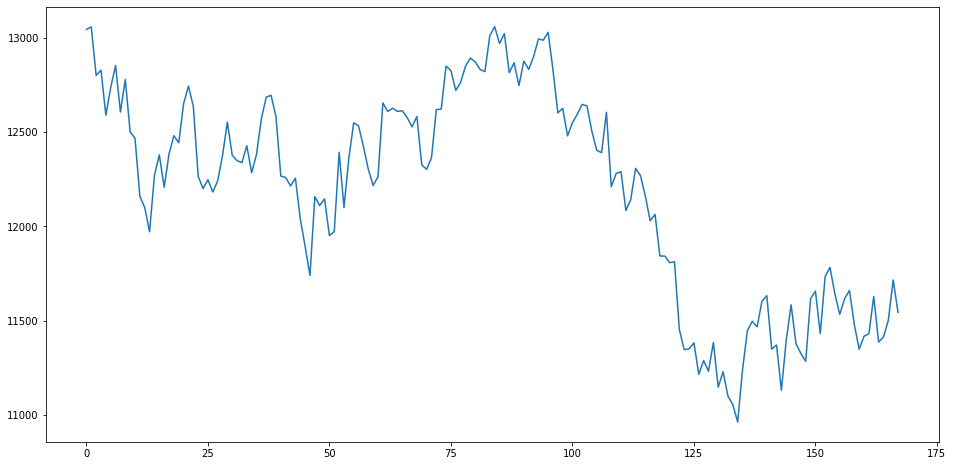

#### Question 11-5. Now over-plot this plot with a `red dot` marker for every day where the dow volume was greater than 5.5 billion.

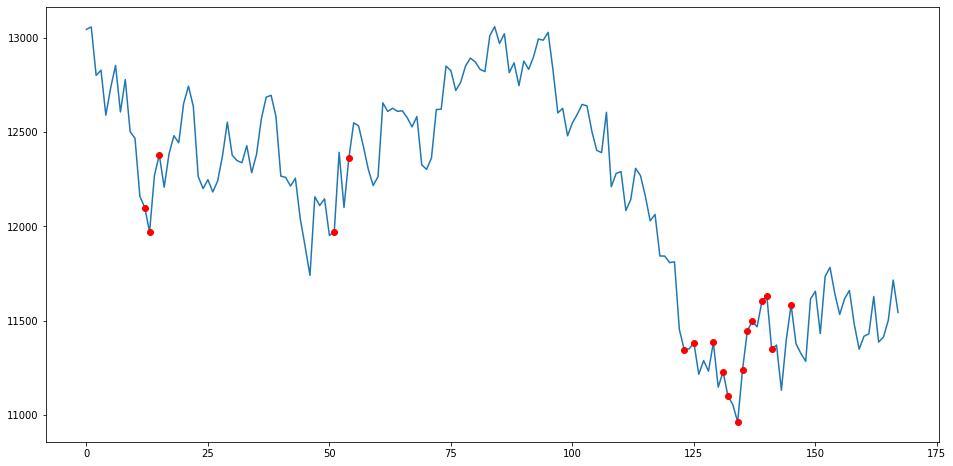

### <font color="green">"Thank you for putting your efforts into the exercise problem sets 💯"</font>